In [1]:
# Refence Arda Yıldız from Kaggel
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Better version for visualization
import plotly.express as px
sns.set_style("whitegrid")
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


# **1. DATA EXPLORATION AND UNDERSTANDING**

##1.1 Dataset Overview

In [2]:
# Load data
df_female_coaches=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/female_coaches.csv")
df_female_players=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/female_players.csv")
df_female_teams=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/female_teams.csv")
df_male_coaches=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/male_coaches.csv")
df_male_players=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/male_players.csv")
df_male_teams=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/male_teams.csv")

<ipython-input-2-a68d215b160b>:6: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_male_players=pd.read_csv("/content/drive/MyDrive/DATASET_PROJECT_PYTHON/Dataset_FIFA_24/male_players.csv")


In [3]:
df_male_players.head(5)

player_id                             player_url  fifa_version  \
0     231747    /player/231747/kylian-mbappe/240002          24.0   
1     239085   /player/239085/erling-haaland/240002          24.0   
2     192985  /player/192985/kevin-de-bruyne/240002          24.0   
3     158023     /player/158023/lionel-messi/240002          24.0   
4     165153    /player/165153/karim-benzema/240002          24.0   

   fifa_update update_as_of    short_name                       long_name  \
0          2.0   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1          2.0   2023-09-22    E. Haaland            Erling Braut Haaland   
2          2.0   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3          2.0   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4          2.0   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential    value_eur  wage_eur  age  \
0           ST, LW       91         94  181500000.0  230000.0   24   
1               ST       91         94  185000000.0  340000.0   22   
2          CM, CAM       91         91  103000000.0  350000.0   32   
3          CF, CAM       90         90   41000000.0   23000.0   36   
4           CF, ST       90         90   51000000.0   95000.0   35   

          dob  height_cm  weight_kg  club_team_id            club_name  \
0  1998-12-20        182         75          73.0  Paris Saint Germain   
1  2000-07-21        195         94          10.0      Manchester City   
2  1991-06-28        181         75          10.0      Manchester City   
3  1987-06-24        169         67      112893.0          Inter Miami   
4  1987-12-19        185         81         607.0           Al Ittihad   

   league_id          league_name  league_level club_position  \
0       16.0              Ligue 1           1.0            LW   
1       13.0       Premier League           1.0            ST   
2       13.0       Premier League           1.0           SUB   
3       39.0  Major League Soccer           1.0            RF   
4      350.0           Pro League           1.0            RS   

   club_jersey_number club_loaned_from club_joined_date  \
0                 7.0              NaN       2018-07-01   
1                 9.0              NaN       2022-07-01   
2                17.0              NaN       2015-08-30   
3                10.0              NaN       2023-07-16   
4                 9.0              NaN       2023-07-01   

   club_contract_valid_until_year  nationality_id nationality_name  \
0                          2024.0              18           France   
1                          2027.0              36           Norway   
2                          2025.0               7          Belgium   
3                          2025.0              52        Argentina   
4                          2026.0              18           France   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1335.0              LW                  10.0          Right   
1          1352.0              ST                   9.0           Left   
2          1325.0             CAM                   7.0          Right   
3          1369.0              RW                  10.0           Left   
4             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation      work_rate  \
0          4            5                         5       High/Low   
1          3            3                         5    High/Medium   
2          5            4                         5    High/Medium   
3          4            4                         5        Low/Low   
4          4            4                         5  Medium/Medium   

          body_type real_face  release_clause_eur  \
0            Unique       Yes         349400000.0   
1            Unique       Yes         356100000.0   
2            Unique       Yes         190600000.0   
3            U

In [4]:
df_male_teams.head(5)

team_id                           team_url  fifa_version  fifa_update  \
0       10    /team/10/manchester-city/240002            24            2   
1      243       /team/243/real-madrid/240002            24            2   
2     1318          /team/1318/england/240002            24            2   
3       21  /team/21/fc-bayern-munchen/240002            24            2   
4      241      /team/241/fc-barcelona/240002            24            2   

  update_as_of          team_name  league_id             league_name  \
0   2023-09-22    Manchester City         13          Premier League   
1   2023-09-22        Real Madrid         53                 La Liga   
2   2023-09-22            England         78  Friendly International   
3   2023-09-22  FC Bayern München         19              Bundesliga   
4   2023-09-22       FC Barcelona         53                 La Liga   

   league_level  nationality_id nationality_name  overall  attack  midfield  \
0           1.0              14          England       85      87        86   
1           1.0              45            Spain       85      85        85   
2           NaN              14          England       85      86        83   
3           1.0              21          Germany       84      90        84   
4           1.0              45            Spain       84      84        84   

   defence  coach_id                          home_stadium  rival_team  \
0       83  455361.0                        Etihad Stadium          11   
1       83  455800.0             Estadio Santiago Bernabéu         241   
2       83  474589.0                       Wembley Stadium        1337   
3       83  523937.0  Sanderson Park (FIFA 13 NEW generic)          22   
4       83  184942.0         El Libertador (La Bombastico)         243   

   international_prestige  domestic_prestige  transfer_budget_eur  \
0                      10               10.0                  NaN   
1                      10               10.0                  NaN   
2                       8                NaN                  NaN   
3                       9               10.0                  NaN   
4                      10               10.0                  NaN   

   club_worth_eur  starting_xi_average_age  whole_team_average_age   captain  \
0    4.600000e+09                    26.91                   25.14  188377.0   
1    4.800000e+09                    25.91                   24.52  204963.0   
2             NaN                    27.45                   26.62  202126.0   
3    3.800000e+09                    26.09                   25.84  212622.0   
4    4.300000e+09                    27.00                   23.94  192448.0   

   short_free_kick  long_free_kick  left_short_free_kick  \
0         237692.0        246191.0              246191.0   
1         197445.0        197445.0              239053.0   
2         205988.0        202126.0              205988.0   
3         222492.0        212622.0              212622.0   
4         188545.0        186942.0              188545.0   

   right_short_free_kick  penalties  left_corner  right_corner  \
0               237692.0   239085.0     246191.0      237692.0   
1               197445.0   243812.0     239053.0      239053.0   
2               205988.0   202126.0     205988.0      205988.0   
3               222492.0   202126.0     212622.0      222492.0   
4               233419.0   188545.0     228702.0      233419.0   

                     def_style  def_team_width  def_team_depth  \
0  Press after possession loss            71.0            61.0   
1                     Balanced            51.0            71.0   
2  Press after possession loss            61.0            61.0   
3      Pressure on heavy touch            51.0            81.0   
4                     Balanced            61.0            81.0   

   def_defence_pressure  def_defence_aggression  def_defence_width  \
0                   NaN                     NaN                NaN   
1 

In [5]:
df_male_coaches.head(5)

coach_id                  coach_url   short_name       long_name  \
0        24  /coach/24/david-unsworth/  D. Unsworth  David Unsworth   
1        50  /coach/50/steven-gerrard/   S. Gerrard  Steven Gerrard   
2        95   /coach/95/frank-lampard/   F. Lampard   Frank Lampard   
3       121  /coach/121/carl-hoefkens/  C. Hoefkens   Carl Hoefkens   
4       126    /coach/126/andy-dawson/    A. Dawson     Andy Dawson   

          dob nationality_name  \
0  1973-10-16          England   
1  1980-05-30          England   
2  1978-06-20          England   
3  1978-10-05          Belgium   
4  1978-10-20          England   

                                                 coach_face_url  \
0                                                           NaN   
1    https://cdn.sportmonks.com/images/soccer/players/18/50.png   
2    https://cdn.sportmonks.com/images/soccer/players/31/95.png   
3  https://cdn.sportmonks.com/images//soccer/coaches/25/121.png   
4                                                           NaN   

                           nation_flag_url  
0  https://cdn.sofifa.net/flags/gb-eng.png  
1  https://cdn.sofifa.net/flags/gb-eng.png  
2  https://cdn.sofifa.net/flags/gb-eng.png  
3      https://cdn.sofifa.net/flags/be.png  
4  https://cdn.sofifa.net/flags/gb-eng.png

## 1.2 Discriptive Data

**Steps provide info data about the central tendency, disperision, shape of distribution of data setnumerical**

### 1.2.1 Players

In [6]:
df_male_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


In [7]:
df_male_players.describe()

player_id   fifa_version  fifa_update        overall  \
count  180021.000000  180021.000000     180021.0  180021.000000   
mean   217326.670294      19.621450          2.0      65.712711   
std     35215.749284       2.838621          0.0       7.018104   
min         2.000000      15.000000          2.0      40.000000   
25%    200759.000000      17.000000          2.0      61.000000   
50%    222734.000000      20.000000          2.0      66.000000   
75%    239858.000000      22.000000          2.0      70.000000   
max    278145.000000      24.000000          2.0      94.000000   

           potential     value_eur      wage_eur            age  \
count  180021.000000  1.778680e+05  178173.00000  180021.000000   
mean       70.779581  2.379142e+06   10638.01081      25.138689   
std         6.255569  6.184358e+06   21637.41400       4.679389   
min        40.000000  1.000000e+03     500.00000      16.000000   
25%        66.000000  3.250000e+05    2000.00000      21.000000   
50%        71.000000  7.500000e+05    4000.00000      25.000000   
75%        75.000000  1.800000e+06   10000.00000      28.000000   
max        95.000000  1.940000e+08  575000.00000      54.000000   

           height_cm      weight_kg   club_team_id      league_id  \
count  180021.000000  180021.000000  178156.000000  178156.000000   
mean      181.287061      75.233356   45263.728210     221.747991   
std         6.764179       6.999181   53516.528046     467.804515   
min       154.000000      49.000000       1.000000       1.000000   
25%       176.000000      70.000000     450.000000      19.000000   
50%       181.000000      75.000000    1891.000000      56.000000   
75%       186.000000      80.000000  110912.000000     308.000000   
max       208.000000     110.000000  131389.000000    2149.000000   

        league_level  club_jersey_number  club_contract_valid_until_year  \
count  177771.000000       178156.000000                   178156.000000   
mean        1.380878           20.302297                     2020.816015   
std         0.750647           17.054347                        2.902942   
min         1.000000            1.000000                     2014.000000   
25%         1.000000            8.000000                     2019.000000   
50%         1.000000           17.000000                     2021.000000   
75%         2.000000           27.000000                     2023.000000   
max         5.000000           99.000000                     2032.000000   

       nationality_id  nation_team_id  nation_jersey_number      weak_foot  \
count   180021.000000    10098.000000          10098.000000  180021.000000   
mean        55.657218    29845.186671             12.226580       2.939657   
std         48.050844    47980.430480              6.911397       0.664775   
min          1.000000      974.000000              1.000000       1.000000   
25%         21.000000     1343.000000              6.000000       3.000000   
50%         45.000000     1365.000000             12.000000       3.000000   
75%         56.000000   105035.000000             18.000000       3.000000   
max        219.000000   111527.000000             97.000000       5.000000   

         skill_moves  international_reputation  release_clause_eur  \
count  180021.000000             180021.000000        1.207220e+05   
mean        2.335689                  1.105171        4.878321e+06   
std         0.754452                  0.381699        1.271795e+07   
min         1.000000                  1.000000        9.000000e+03   
25%         2.000000                  1.000000        6.332500e+05   
50%         2.000000                  1.000000        1.400000e+06   
75%         3.000000                  1.000000        3.600000e+06   
max         5.000000                  5.000000        3.735000e+08   

                pace       shooting        passing      dribbling  \
count  159997.000000  159997.000000  159997.000000  159997.000000   
mean       68.058839    

In [8]:
df_male_players.isnull().sum().to_frame('null count')

null count
player_id              0
player_url             0
fifa_version           0
fifa_update            0
update_as_of           0
...                  ...
lcb                    0
cb                     0
rcb                    0
rb                     0
gk                     0

[109 rows x 1 columns]

In [9]:
# handle null with player don't know club_team_id
df_male_players=df_male_players[df_male_players['club_team_id'].notna()]

In [10]:
df_male_players_criteria=df_male_players[['overall','wage_eur','age']]

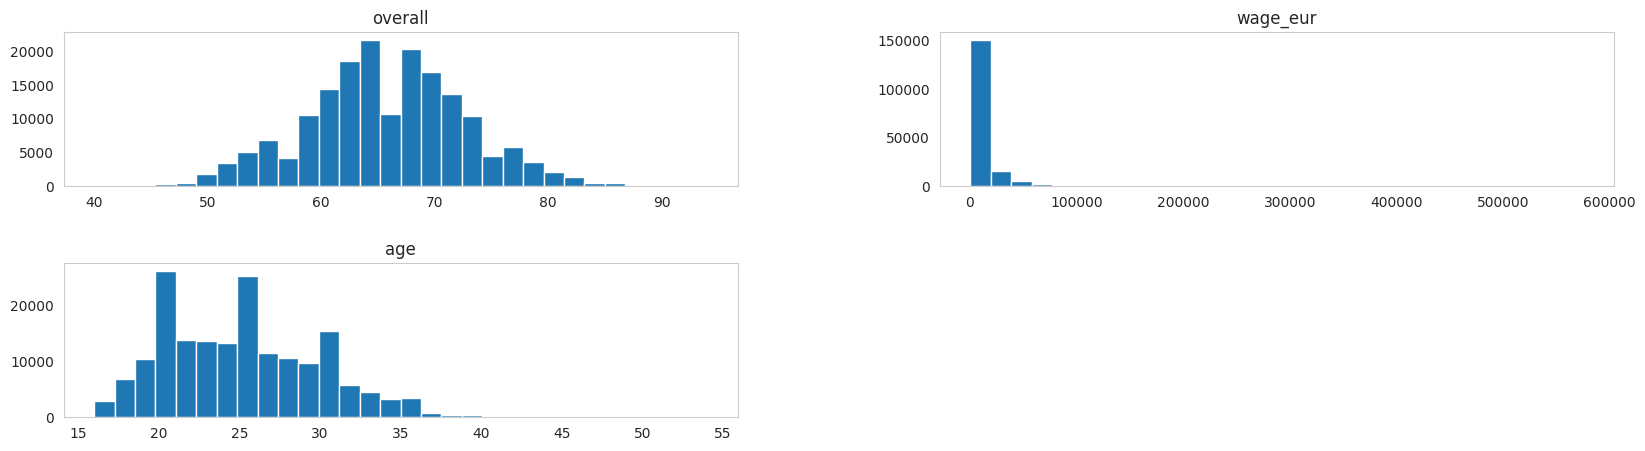

In [11]:
df_male_players_criteria.iloc[:,0:].hist(figsize=(20,5),grid=False, bins=30)
plt.subplots_adjust(hspace=0.5,wspace=0.3)
plt.show()
# Overall information about overall rating, wage, age then deep dive Q1,Q3,IQR

In [12]:
fig_hist_male_player_overall=px.histogram(
    df_male_players, x='overall', nbins=30, marginal='box',
    title='Distribution of Overall Scores for Male Players',
    labels={'overall': 'Overall Score'},
    template='plotly_dark'
)
fig_hist_male_player_overall.show()

+ **Almost players around 60 - 70 rating scor**
> + Q1: 61 rating score
> + Q3: 70 rating score
> + Median: 66
+ **Outstanding players start from overall score 84**
> + Overall Score (84-85): 684 players
> + Overall Score (86-87): 328 players


In [13]:
fig_hist_male_player_age=px.histogram(
    df_male_players, x='age', nbins=30, marginal='box',
    title='Distribution of Age for Male Players',
    labels={'age': 'Age'},
    template='plotly_dark'
)
fig_hist_male_player_age.show()

In [14]:
df_male_players[df_male_players['age']>40]

player_id                                                player_url  \
2557       158784                      /player/158784/jorge-carranza/240002   
3346       210281                  /player/210281/cristian-pellerano/240002   
3935       142962                     /player/142962/enrique-bologna/240002   
4792        25798                     /player/25798/roque-santa-cruz/240002   
4796       152912                           /player/152912/jose-sand/240002   
...           ...                                                       ...   
178010     139479  https://sofifa.com/player/139479/gareth-ainsworth/150002   
179830     168706      https://sofifa.com/player/168706/paul-mathers/150002   
179831     199068      https://sofifa.com/player/199068/ashley-bayes/150002   
180011      11728   https://sofifa.com/player/11728/barry-richardson/150002   
180020     201197      https://sofifa.com/player/201197/paul-tisdale/150002   

        fifa_version  fifa_update update_as_of     short_name  \
2557            24.0          2.0   2023-09-22    J. Carranza   
3346            24.0          2.0   2023-09-22   C. Pellerano   
3935            24.0          2.0   2023-09-22     E. Bologna   
4792            24.0          2.0   2023-09-22  R. Santa Cruz   
4796            24.0          2.0   2023-09-22        J. Sand   
...              ...          ...          ...            ...   
178010          15.0          2.0   2014-09-18   G. Ainsworth   
179830          15.0          2.0   2014-09-18     P. Mathers   
179831          15.0          2.0   2014-09-18       A. Bayes   
180011          15.0          2.0   2014-09-18  B. Richardson   
180020          15.0          2.0   2014-09-18     P. Tisdale   

                            long_name player_positions  overall  potential  \
2557            Jorge Carlos Carranza               GK       73         73   
3346       Cristian Alberto Pellerano          CDM, CM       72         72   
3935    Enrique Alberto Bologna Gómez               GK       71         71   
4792    Roque Luis Santa Cruz Cantero               ST       70         70   
4796                José Gustavo Sand               ST       70         70   
...                               ...              ...      ...        ...   
178010               Gareth Ainsworth           RM, CM       56         56   
179830                   Paul Mathers               GK       49         49   
179831                   Ashley Bayes               GK       49         49   
180011               Barry Richardson               GK       43         43   
180020                   Paul Tisdale          CM, CAM       40         40   

        value_eur  wage_eur  age         dob  height_cm  weight_kg  \
2557     350000.0    5000.0   42  1981-05-07        187         88   
3346          NaN     500.0   41  1982-02-01        184         74   
3935     210000.0    5000.0   41  1982-02-13        189         87   
4792          NaN     500.0   41  1981-08-16        191         93   
4796          NaN    7000.0   42  1980-07-17        182         86   
...           ...       ...  ...         ...        ...        ...   
178010        NaN    2000.0   41  1973-05-10        178         79   
179830     6000.0    2000.0   44  1970-01-17        183         72   
179831     6000.0    2000.0   42  1972-04-19        185         85   
180011     6000.0    2000.0   44  1969-08-05        185         77   
180020        NaN    2000.0   41  1973-01-14        175         72   

        club_team_id                club_name  league_id       league_name  \
2557        110953.0                Instituto      353.0  Liga Profesional   
3346        112908.0  Independiente del Valle     2018.0          Liga Pro   
3935        111710.0       Defensa y Justicia      353.0  Liga Profesional   
4792        111008.0                 Libertad      337.0  Primera División   
4796        110395.0                    Lanús      353.0  Liga Profesional   
...              ...            

In [15]:
fig_hist_male_player_wage=px.histogram(
    df_male_players, x='wage_eur', nbins=30, marginal='box',
    title='Distribution of Wage for Male Players',
    labels={'wage_eur': 'Wage (EUR)'},
    template='plotly_dark'
)
fig_hist_male_player_wage.show()

### 1.2.2 Male_Teams



In [16]:
df_male_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6947 entries, 0 to 6946
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   team_id                      6947 non-null   int64  
 1   team_url                     6947 non-null   object 
 2   fifa_version                 6947 non-null   int64  
 3   fifa_update                  6947 non-null   int64  
 4   update_as_of                 6947 non-null   object 
 5   team_name                    6947 non-null   object 
 6   league_id                    6947 non-null   int64  
 7   league_name                  6947 non-null   object 
 8   league_level                 6497 non-null   float64
 9   nationality_id               6947 non-null   int64  
 10  nationality_name             6947 non-null   object 
 11  overall                      6947 non-null   int64  
 12  attack                       6947 non-null   int64  
 13  midfield          

In [17]:
df_male_teams.describe()

team_id  fifa_version  fifa_update    league_id  league_level  \
count    6947.000000   6947.000000       6947.0  6947.000000   6497.000000   
mean    44950.297682     19.608320          2.0   216.713977      1.386640   
std     53463.946306      2.836743          0.0   460.967263      0.761282   
min         1.000000     15.000000          2.0     1.000000      1.000000   
25%       485.000000     17.000000          2.0    20.000000      1.000000   
50%      1880.000000     20.000000          2.0    60.000000      1.000000   
75%    110932.500000     22.000000          2.0   308.000000      2.000000   
max    131389.000000     24.000000          2.0  2149.000000      5.000000   

       nationality_id      overall       attack     midfield      defence  \
count     6947.000000  6947.000000  6947.000000  6947.000000  6947.000000   
mean        49.504966    68.941845    69.409097    68.796603    68.254930   
std         48.908010     5.412425     5.896840     5.560152     5.428348   
min          4.000000    52.000000    48.000000    53.000000    52.000000   
25%         18.000000    65.000000    65.000000    65.000000    64.000000   
50%         38.000000    68.000000    69.000000    68.000000    68.000000   
75%         54.000000    72.000000    73.000000    72.000000    71.000000   
max       1037.000000    86.000000    92.000000    89.000000    87.000000   

           coach_id     rival_team  international_prestige  domestic_prestige  \
count  6.910000e+03    6947.000000             6947.000000        6511.000000   
mean   6.555124e+06   35319.262991                3.702893           6.562586   
std    1.252576e+07   50616.960047                3.413797           3.988198   
min    2.400000e+01       1.000000                1.000000           1.000000   
25%    2.144415e+05     299.000000                1.000000           4.000000   
50%    4.681960e+05    1463.000000                2.000000           6.000000   
75%    1.846740e+06  110173.500000                5.000000           9.000000   
max    3.771543e+07  116361.000000               20.000000          20.000000   

       transfer_budget_eur  club_worth_eur  starting_xi_average_age  \
count         5.162000e+03    5.329000e+03              6947.000000   
mean          8.047853e+06    1.134621e+08                26.753448   
std           1.717938e+07    3.944747e+08                 1.729589   
min           1.000000e+05    9.150000e+05                19.000000   
25%           1.200000e+06    5.500000e+06                25.550000   
50%           2.900000e+06    1.400000e+07                26.730000   
75%           7.000000e+06    6.000000e+07                27.910000   
max           1.909000e+08    4.800000e+09                33.640000   

       whole_team_average_age        captain  short_free_kick  long_free_kick  \
count             6947.000000    6909.000000      6908.000000     6907.000000   
mean                25.234868  184390.888551    199317.695715   199277.171710   
std                  1.512659   47245.550405     39395.457860    39760.125068   
min                 19.110000      16.000000        16.000000       16.000000   
25%                 24.210000  166862.000000    184941.000000   184484.000000   
50%                 25.150000  190942.000000    204217.500000   204238.000000   
75%                 26.170000  213471.000000    223747.000000   224237.000000   
max                 32.600000  276802.000000    277069.000000   276699.000000   

       left_short_free_kick  right_short_free_kick      penalties  \
count           6906.000000            6908.000000    6900.000000   
mean          199517.656965          199603.956862  196777.570435   
std            39442.103283           39427.667431   42161.268682   
min               16.000000              16.000000      16.000000   
25%           184858.000000          185344.750000  183540.000000   
50%           204291.000000          204392.000000  202126.000000   
75%           224186.750000      

In [18]:
df_male_teams.isnull().sum().to_frame('count_null')

count_null
team_id                               0
team_url                              0
fifa_version                          0
fifa_update                           0
update_as_of                          0
team_name                             0
league_id                             0
league_name                           0
league_level                        450
nationality_id                        0
nationality_name                      0
overall                               0
attack                                0
midfield                              0
defence                               0
coach_id                             37
home_stadium                         12
rival_team                            0
international_prestige                0
domestic_prestige                   436
transfer_budget_eur                1785
club_worth_eur                     1618
starting_xi_average_age               0
whole_team_average_age                0
captain                              38
short_free_kick                      39
long_free_kick                       40
left_short_free_kick                 41
right_short_free_kick                39
penalties                            47
left_corner                          42
right_corner                         40
def_style                          2653
def_team_width                     2653
def_team_depth                     2653
def_defence_pressure               3595
def_defence_aggression             3595
def_defence_width                  3595
def_defence_defender_line          3595
off_style                          4801
off_build_up_play                  4799
off_chance_creation                4799
off_team_width                     2653
off_players_in_box                 2653
off_corners                        2653
off_free_kicks                     2653
build_up_play_speed                3595
build_up_play_dribbling            3595
build_up_play_passing              3595
build_up_play_positioning          3595
chance_creation_passing            3595
chance_creation_crossing           3595
chance_creation_shooting           3595
chance_creation_positioning        3595

In [19]:
fig_hist_male_teams = px.histogram(
    df_male_teams, x='overall', nbins=30, marginal='box',
    title='Distribution of Overall Scores for Male Teams',
    labels={'overall': 'Overall Score'},
    template='plotly_dark'
)
fig_hist_male_teams.show()


In [20]:
q1=df_male_teams['overall'].quantile(0.25)
q3=df_male_teams['overall'].quantile(0.75)
IQR=q3-q1
print(q1,q3,IQR)

65.0 72.0 7.0


In [21]:
df_dub_male_team= df_male_teams[df_male_teams.duplicated(keep=False)]

In [22]:
df_dub_male_team.sort_values(by='team_id',ascending=False).head(10)

Empty DataFrame
Columns: [team_id, team_url, fifa_version, fifa_update, update_as_of, team_name, league_id, league_name, league_level, nationality_id, nationality_name, overall, attack, midfield, defence, coach_id, home_stadium, rival_team, international_prestige, domestic_prestige, transfer_budget_eur, club_worth_eur, starting_xi_average_age, whole_team_average_age, captain, short_free_kick, long_free_kick, left_short_free_kick, right_short_free_kick, penalties, left_corner, right_corner, def_style, def_team_width, def_team_depth, def_defence_pressure, def_defence_aggression, def_defence_width, def_defence_defender_line, off_style, off_build_up_play, off_chance_creation, off_team_width, off_players_in_box, off_corners, off_free_kicks, build_up_play_speed, build_up_play_dribbling, build_up_play_passing, build_up_play_positioning, chance_creation_passing, chance_creation_crossing, chance_creation_shooting, chance_creation_positioning]
Index: []

In [23]:
#No duplicate at team_id

#**2. DATA PROCESSING AND ANALYST**

## 2.1 New feature 'Team_strength'

In [24]:
df_male_teams['team_strenght']=df_male_teams[['attack','midfield','defence']].mean(axis=1)

In [25]:
df_table_overall_team=df_male_teams[['overall','team_strenght','team_name','league_id']].sort_values(by=['overall','team_strenght'],ascending=[False,False])

In [26]:
df_table_overall_team.drop_duplicates(subset='team_name',keep='first',inplace=True)

##2.2 Anlyze club and nation

### 2.2.1 CLUB

In [27]:
df_club=df_table_overall_team[df_table_overall_team['league_id'] !=78]

In [28]:
df_club['Rank']= df_club['team_strenght'].rank(ascending=False,method='dense')

<ipython-input-28-ed7f6dba760a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df_club= df_club.sort_values(by='Rank')

In [30]:
df_club.head(10)

overall  team_strenght            team_name  league_id  Rank
4294       86      87.333333    FC Bayern München         19   1.0
4992       86      86.666667          Real Madrid         53   2.0
2879       86      86.333333         FC Barcelona         53   3.0
2148       85      86.333333            Liverpool         13   3.0
3600       85      86.333333             Juventus         31   3.0
1414       86      85.666667  Paris Saint Germain         16   4.0
2878       86      85.333333      Manchester City         13   5.0
708        84      84.666667              Chelsea         13   6.0
3604       84      84.666667      Atlético Madrid         53   6.0
3609       83      84.666667    Tottenham Hotspur         13   6.0

In [31]:
fig_club_team_strength=px.bar(
    df_club.head(10), x='team_name', y='team_strenght',
    title='team_strenght',
    labels={'team_strenght': 'team_strenght'},
    template='plotly_dark'
)
fig_club_team_strength.show()


In [32]:
fig_his_club_team_strength=px.histogram(
    df_club, x='team_strenght', nbins=30, marginal='box',
    title='Distribution of Overall Scores for Male teams',
    labels={'overall': 'Overall Score'},
    template='plotly_dark'
)
fig_his_club_team_strength.show()

### 2.2.2 Nation

In [33]:
df_nation=df_table_overall_team[df_table_overall_team['league_id'] ==78]

In [34]:
df_nation['rank']=df_nation['team_strenght'].rank(ascending=False,method='dense')

<ipython-input-34-97dac548149c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df_nation=df_nation.sort_values(by='rank')

In [36]:
fig_hist_nation = px.histogram(
    df_nation, x='team_strenght', nbins=30, marginal='box',
    title='Distribution of Overall Scores for Male teams',
    labels={'overall': 'Overall Score'},
    template='plotly_dark'
)
fig_hist_nation.show()

In [37]:
df_nation[df_nation['team_strenght'] <65]

overall  team_strenght team_name  league_id  rank
4278       61      60.666667     India         78  37.0

In [38]:
fig_nation_team_strength=px.bar(
    df_nation.head(10), x='team_name', y='team_strenght',
    title='Natio team strenght',
    labels={'team_strenght': 'team'},
    template='plotly_dark'
)
fig_nation_team_strength.show()

## 2.3 TACTIC ANALYSIS

**Discover tactics using by team through frequency distribution**

In [39]:
df_male_teams.head(2)

team_id                         team_url  fifa_version  fifa_update  \
0       10  /team/10/manchester-city/240002            24            2   
1      243     /team/243/real-madrid/240002            24            2   

  update_as_of        team_name  league_id     league_name  league_level  \
0   2023-09-22  Manchester City         13  Premier League           1.0   
1   2023-09-22      Real Madrid         53         La Liga           1.0   

   nationality_id nationality_name  overall  attack  midfield  defence  \
0              14          England       85      87        86       83   
1              45            Spain       85      85        85       83   

   coach_id               home_stadium  rival_team  international_prestige  \
0  455361.0             Etihad Stadium          11                      10   
1  455800.0  Estadio Santiago Bernabéu         241                      10   

   domestic_prestige  transfer_budget_eur  club_worth_eur  \
0               10.0                  NaN    4.600000e+09   
1               10.0                  NaN    4.800000e+09   

   starting_xi_average_age  whole_team_average_age   captain  short_free_kick  \
0                    26.91                   25.14  188377.0         237692.0   
1                    25.91                   24.52  204963.0         197445.0   

   long_free_kick  left_short_free_kick  right_short_free_kick  penalties  \
0        246191.0              246191.0               237692.0   239085.0   
1        197445.0              239053.0               197445.0   243812.0   

   left_corner  right_corner                    def_style  def_team_width  \
0     246191.0      237692.0  Press after possession loss            71.0   
1     239053.0      239053.0                     Balanced            51.0   

   def_team_depth  def_defence_pressure  def_defence_aggression  \
0            61.0                   NaN                     NaN   
1            71.0                   NaN                     NaN   

   def_defence_width def_defence_defender_line off_style off_build_up_play  \
0                NaN                       NaN       NaN          Balanced   
1                NaN                       NaN       NaN          Balanced   

  off_chance_creation  off_team_width  off_players_in_box  off_corners  \
0            Balanced            81.0                 6.0          3.0   
1            Balanced            51.0                 6.0          3.0   

   off_free_kicks  build_up_play_speed  build_up_play_dribbling  \
0             3.0                  NaN                      NaN   
1             3.0                  NaN                      NaN   

   build_up_play_passing build_up_play_positioning  chance_creation_passing  \
0                    NaN                       NaN                      NaN   
1                    NaN                       NaN                      NaN   

   chance_creation_crossing  chance_creation_shooting  \
0                       NaN                       NaN   
1                       NaN                       NaN   

  chance_creation_positioning  team_strenght  
0                         NaN      85.333333  
1                         NaN      84.333333

In [40]:
def_style_counts = df_male_teams['def_style'].value_counts()
off_style_counts = df_male_teams['off_style'].value_counts()
def_style_counts, off_style_counts
print('total_def_style',df_male_teams['def_style'].count())
print(def_style_counts)
print('------------------')
print('total_off_style',df_male_teams['off_style'].count())
print(off_style_counts)


total_def_style 4294
def_style
Balanced                       2245
Pressure On Heavy Touch         759
Press After Possession Loss     468
Drop Back                       396
Constant Pressure               174
Pressure on heavy touch         134
Press after possession loss     118
Name: count, dtype: int64
------------------
total_off_style 2146
off_style
Balanced         996
Long Ball        584
Possession       446
Fast Build Up    120
Name: count, dtype: int64


In [41]:
fig_def=px.bar(def_style_counts,title='Defensive Style',template='plotly_dark')
fig_off=px.bar(off_style_counts,title='Offensive Style',template='plotly_dark')
fig_def.show()
fig_off.show()

Notes:
- Both defense and offense favor balance
- Def_style (4294) more than offense(2146)


##2.4 PLAYER

###2.4.1 Analyze club_position through frequence distribution

In [42]:
df_male_players.head(2)

player_id                            player_url  fifa_version  fifa_update  \
0     231747   /player/231747/kylian-mbappe/240002          24.0          2.0   
1     239085  /player/239085/erling-haaland/240002          24.0          2.0   

  update_as_of  short_name             long_name player_positions  overall  \
0   2023-09-22   K. Mbappé  Kylian Mbappé Lottin           ST, LW       91   
1   2023-09-22  E. Haaland  Erling Braut Haaland               ST       91   

   potential    value_eur  wage_eur  age         dob  height_cm  weight_kg  \
0         94  181500000.0  230000.0   24  1998-12-20        182         75   
1         94  185000000.0  340000.0   22  2000-07-21        195         94   

   club_team_id            club_name  league_id     league_name  league_level  \
0          73.0  Paris Saint Germain       16.0         Ligue 1           1.0   
1          10.0      Manchester City       13.0  Premier League           1.0   

  club_position  club_jersey_number club_loaned_from club_joined_date  \
0            LW                 7.0              NaN       2018-07-01   
1            ST                 9.0              NaN       2022-07-01   

   club_contract_valid_until_year  nationality_id nationality_name  \
0                          2024.0              18           France   
1                          2027.0              36           Norway   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1335.0              LW                  10.0          Right   
1          1352.0              ST                   9.0           Left   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            5                         5     High/Low    Unique   
1          3            3                         5  High/Medium    Unique   

  real_face  release_clause_eur  \
0       Yes         349400000.0   
1       Yes         356100000.0   

                                                                           player_tags  \
0               #Speedster, #Dribbler, #Acrobat, #Clinical finisher, #Complete forward   
1  #Aerial threat, #Distance shooter, #Strength, #Clinical finisher, #Complete forward   

                           player_traits  pace  shooting  passing  dribbling  \
0    Quick Step +, Rapid, Flair, Trivela  97.0      90.0     80.0       92.0   
1  Acrobatic +, Power Header, Quick Step  89.0      93.0     66.0       80.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       36.0    78.0                  78                   94   
1       45.0    88.0                  47                   96   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          73                       86                 84   
1                          83                       77                 90   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               93           80                 69                  71   
1               79           77                 62                  53   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  92                     97                     97   
1                  82                     82                     94   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  93                82                90   
1                76                  94                72                94   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             88             88              77                83   
1             93             76              93                86   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    64                       38                     93   
1                    87                       43                     96   

 

In [43]:
player_position_counts = df_male_players['club_position'].value_counts()
player_position_counts=player_position_counts.reset_index()


In [44]:
drop_sub_res=player_position_counts[(player_position_counts['club_position']!='SUB')&(player_position_counts['club_position']!='RES')]

In [45]:
drop_sub_res

club_position  count
2             GK   6507
3            RCB   6505
4            LCB   6498
5             RB   5391
6             LB   5385
7             ST   4448
8             RM   4094
9             LM   4087
10           RCM   3995
11           LCM   3995
12           CAM   2988
13           RDM   2417
14           LDM   2416
15            LS   2027
16            RS   2027
17           CDM   1661
18            LW   1519
19            RW   1516
20            CB   1117
21           LWB    679
22           RWB    678
23            CM    641
24           LAM    251
25           RAM    250
26            LF    162
27            RF    162
28            CF    107

In [46]:
fig_position=px.bar(drop_sub_res, x='count', y='club_position',title='Player Position',template='plotly_dark', orientation='h')
fig_position.show()

 ### **2.4.2 Choose best player for each positon**

In [47]:
df_group_best=df_male_players.groupby('club_position').agg(
    max_overall=('overall','max')
).reset_index().sort_values(by='club_position',ascending=True)

In [48]:
df_group_best['best_id']=df_group_best['max_overall'].astype(str)+df_group_best['club_position']

In [49]:
df_group_best

club_position  max_overall best_id
0            CAM           93   93CAM
1             CB           88    88CB
2            CDM           89   89CDM
3             CF           93    93CF
4             CM           87    87CM
5             GK           92    92GK
6            LAM           86   86LAM
7             LB           88    88LB
8            LCB           91   91LCB
9            LCM           90   90LCM
10           LDM           88   88LDM
11            LF           86    86LF
12            LM           93    93LM
13            LS           92    92LS
14            LW           94    94LW
15           LWB           83   83LWB
16           RAM           85   85RAM
17            RB           88    88RB
18           RCB           90   90RCB
19           RCM           91   91RCM
20           RDM           89   89RDM
21           RES           89   89RES
22            RF           90    90RF
23            RM           88    88RM
24            RS           90    90RS
25            RW           94    94RW
26           RWB           84   84RWB
27            ST           94    94ST
28           SUB           91   91SUB

In [50]:
df_new_male_players=df_male_players

In [51]:
df_new_male_players['position_overal']=df_new_male_players['overall'].astype(str)+df_new_male_players['club_position']

In [52]:
df_best_name_player=pd.merge(df_group_best,df_new_male_players,how='left',left_on='best_id',right_on='position_overal')

In [53]:
df_best_name_player[['club_position_x','short_name','max_overall','potential','age']].drop_duplicates(subset='club_position_x',keep='first')

club_position_x         short_name  max_overall  potential  age
0              CAM           L. Messi           93         93   33
1               CB         Marquinhos           88         90   28
2              CDM           Casemiro           89         89   29
5               CF           L. Messi           93         95   27
6               CM          M. Hamšík           87         87   30
7               GK           M. Neuer           92         92   31
9              LAM          C. Nkunku           86         89   24
10              LB       João Cancelo           88         88   28
12             LCB       Sergio Ramos           91         91   32
13             LCM           T. Kroos           90         90   28
15             LDM           P. Pogba           88         91   26
17              LF           A. Gómez           86         86   32
18              LM  Cristiano Ronaldo           93         93   30
19              LS  Cristiano Ronaldo           92         92   35
20              LW  Cristiano Ronaldo           94         94   32
22             LWB           Angeliño           83         85   25
23             RAM          H. Ziyech           85         86   26
24              RB            P. Lahm           88         88   32
25             RCB         J. Boateng           90         90   27
26             RCM       K. De Bruyne           91         91   31
32             RDM         J. Kimmich           89         90   27
34             RES          L. Suárez           89         91   27
35              RF           L. Messi           90         90   36
36              RM         C. Eriksen           88         89   27
38              RS         K. Benzema           90         90   35
39              RW           L. Messi           94         94   32
42             RWB           R. James           84         88   22
44              ST  Cristiano Ronaldo           94         94   33
45             SUB       K. De Bruyne           91         91   32

## 2.5 League analysis

In [54]:
df_male_teams.groupby('league_name').agg(
    count_team=('team_id','nunique')
    ,max_overall=('overall','max')
    ,min_overall=('overall','min')
    ,mean_overall=('overall','mean')
    ,median_overall=('overall','median')
    ,median_team_strenght=('team_strenght','median')
    ,median_age=('whole_team_average_age','median')).reset_index().sort_values(by='count_team',ascending=False)


league_name  count_team  max_overall  min_overall  \
34        Primera Division          61           75           59   
39            Super League          59           76           55   
12  Friendly International          56           86           57   
37                 Serie A          52           85           63   
32          Premier League          47           86           59   
38                 Serie B          46           76           61   
17               La Liga 2          46           78           63   
3                  3. Liga          39           73           60   
26        Liga Profesional          39           77           61   
40               Super Lig          38           79           63   
6               Bundesliga          37           86           60   
28                 Ligue 2          37           76           62   
19              League Two          35           66           55   
8              Ekstraklasa          30           72           61   
29     Major League Soccer          30           74           64   
24           Liga Portugal          30           80           65   
36              Pro League          28           77           56   
10              Eredivisie          28           79           64   
21            Liga BetPlay          27           72           62   
5              Allsvenskan          27           70           60   
13                J-League          26           71           62   
18              League One          25           72           58   
14      Jupiler Pro League          24           76           64   
7             Championship          24           80           60   
23                 Liga MX          24           75           64   
9              Eliteserien          23           70           60   
20                  Liga 1          23           70           61   
16                 La Liga          20           86           65   
41               Superliga          19           72           58   
2            2. Bundesliga          19           79           63   
27                 Ligue 1          18           86           63   
31        Premier Division          18           64           52   
15              K League 1          17           71           61   
33             Premiership          16           74           59   
25                Liga Pro          13           71           63   
35        Primera División          13           73           61   
4                 A-League          12           67           59   
22     Liga De Futbol Prof          11           67           63   
11            Fortuna Liga           3           75           70   
1                   1. HNL           2           73           70   
0              1. Division           1           69           69   
30                   NB I.           1           71           71   
42           Veikkausliiga           1           65           62   

    mean_overall  median_overall  median_team_strenght  median_age  
34     66.821429            66.0             66.333333      25.440  
39     65.892193            66.0             66.000000      25.680  
12     75.545872            75.0             75.000000      26.740  
37     73.927928            74.0             73.333333      26.220  
32     74.691318            75.0             74.666667      25.070  
38     68.194872            68.0             67.666667      25.040  
17     69.825112            69.0             69.000000      25.450  
3      65.191358            65.0             64.666667      24.560  
26     69.417293            69.0             69.000000      25.615  
40     71.191489            71.0             70.666667      26.310  
6      71.609589            72.0             71.666667      24.320  
28     67.772727            67.0             66.833333      24.845  
19     62.065844            62.0             62.000000      24.220  
8      65.361446            65.0             65.000000  

## 2.6 Correlation

### 2.6.1 factors correlation male players

In [55]:
df_male_players.head(1)

player_id                           player_url  fifa_version  fifa_update  \
0     231747  /player/231747/kylian-mbappe/240002          24.0          2.0   

  update_as_of short_name             long_name player_positions  overall  \
0   2023-09-22  K. Mbappé  Kylian Mbappé Lottin           ST, LW       91   

   potential    value_eur  wage_eur  age         dob  height_cm  weight_kg  \
0         94  181500000.0  230000.0   24  1998-12-20        182         75   

   club_team_id            club_name  league_id league_name  league_level  \
0          73.0  Paris Saint Germain       16.0     Ligue 1           1.0   

  club_position  club_jersey_number club_loaned_from club_joined_date  \
0            LW                 7.0              NaN       2018-07-01   

   club_contract_valid_until_year  nationality_id nationality_name  \
0                          2024.0              18           France   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1335.0              LW                  10.0          Right   

   weak_foot  skill_moves  international_reputation work_rate body_type  \
0          4            5                         5  High/Low    Unique   

  real_face  release_clause_eur  \
0       Yes         349400000.0   

                                                              player_tags  \
0  #Speedster, #Dribbler, #Acrobat, #Clinical finisher, #Complete forward   

                         player_traits  pace  shooting  passing  dribbling  \
0  Quick Step +, Rapid, Flair, Trivela  97.0      90.0     80.0       92.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       36.0    78.0                  78                   94   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          73                       86                 84   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               93           80                 69                  71   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  92                     97                     97   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  93                82                90   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             88             88              77                83   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    64                       38                     93   

   mentality_vision  mentality_penalties  mentality_composure  \
0                83                   84                 88.0   

   defending_marking_awareness  defending_standing_tackle  \
0                           26                         34   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        32                  13                     5   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                    7                       11                     6   

   goalkeeping_speed    ls    st    rs  lw  lf  cf  rf  rw   lam   cam   ram  \
0                NaN  90+3  90+3  90+3  91  91  91  91  91  89+3  89+3  89+3   

     lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb  \
0  89+3  81+3  81+3  81+3  89+3  68+3  63+3  63+3  63+3  68+3  63+3  54+3   

     cb   rcb    rb    gk position_overal  
0  54+3  54+3  63+3  18+3            91LW

In [56]:
corr_metric_factor=df_male_players[['overall','potential','value_eur','wage_eur','age','height_cm']].corr()

In [57]:
import plotly.figure_factory as ff
z= corr_metric_factor.values
x= corr_metric_factor.index.tolist()
y= corr_metric_factor.columns.tolist()

fig= ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z.round(2), showscale=True,colorscale='Viridis')

fig.show()

> - Overall and potential has a correlation (0,69)
> - Overall and (value_eur & wage_eur) has a correlation(0,52 and 0,6)
>>- It means the player well will get more wage and value
> - Potential and age has a negative correlation (-0,2)
> - Wage and value has a strong correlation (0.78)
> - Height_cm is not a factor affecting your performance in football
>>- Height_cm correlation with overall (0.04)
>>- Height_cm correlation with overall (0.08)

### 2.6.2 factors correlation male teams

In [58]:
df_male_teams.head(2)

team_id                         team_url  fifa_version  fifa_update  \
0       10  /team/10/manchester-city/240002            24            2   
1      243     /team/243/real-madrid/240002            24            2   

  update_as_of        team_name  league_id     league_name  league_level  \
0   2023-09-22  Manchester City         13  Premier League           1.0   
1   2023-09-22      Real Madrid         53         La Liga           1.0   

   nationality_id nationality_name  overall  attack  midfield  defence  \
0              14          England       85      87        86       83   
1              45            Spain       85      85        85       83   

   coach_id               home_stadium  rival_team  international_prestige  \
0  455361.0             Etihad Stadium          11                      10   
1  455800.0  Estadio Santiago Bernabéu         241                      10   

   domestic_prestige  transfer_budget_eur  club_worth_eur  \
0               10.0                  NaN    4.600000e+09   
1               10.0                  NaN    4.800000e+09   

   starting_xi_average_age  whole_team_average_age   captain  short_free_kick  \
0                    26.91                   25.14  188377.0         237692.0   
1                    25.91                   24.52  204963.0         197445.0   

   long_free_kick  left_short_free_kick  right_short_free_kick  penalties  \
0        246191.0              246191.0               237692.0   239085.0   
1        197445.0              239053.0               197445.0   243812.0   

   left_corner  right_corner                    def_style  def_team_width  \
0     246191.0      237692.0  Press after possession loss            71.0   
1     239053.0      239053.0                     Balanced            51.0   

   def_team_depth  def_defence_pressure  def_defence_aggression  \
0            61.0                   NaN                     NaN   
1            71.0                   NaN                     NaN   

   def_defence_width def_defence_defender_line off_style off_build_up_play  \
0                NaN                       NaN       NaN          Balanced   
1                NaN                       NaN       NaN          Balanced   

  off_chance_creation  off_team_width  off_players_in_box  off_corners  \
0            Balanced            81.0                 6.0          3.0   
1            Balanced            51.0                 6.0          3.0   

   off_free_kicks  build_up_play_speed  build_up_play_dribbling  \
0             3.0                  NaN                      NaN   
1             3.0                  NaN                      NaN   

   build_up_play_passing build_up_play_positioning  chance_creation_passing  \
0                    NaN                       NaN                      NaN   
1                    NaN                       NaN                      NaN   

   chance_creation_crossing  chance_creation_shooting  \
0                       NaN                       NaN   
1                       NaN                       NaN   

  chance_creation_positioning  team_strenght  
0                         NaN      85.333333  
1                         NaN      84.333333

In [59]:
df_male_teams[['team_strenght','club_worth_eur','whole_team_average_age']].corr()

team_strenght  club_worth_eur  whole_team_average_age
team_strenght                1.000000         0.55127                0.197338
club_worth_eur               0.551270         1.00000               -0.038850
whole_team_average_age       0.197338        -0.03885                1.000000

> - Team_strenght and club_worth have a remarkable correlation (0,55)
>> - Meaning club spent more money can get more team_strenght

In [60]:
fig= px.scatter(df_male_teams, x='team_strenght', y='club_worth_eur', title='Team Strenght vs Club Worth', template='plotly_dark')
fig.show()

## 2.7 Distribution of team attribute

In [65]:
position=['attack','midfield','defence']
for x in position:
  fig= px.histogram(df_male_teams,x=x, nbins=30, marginal='box',
                    title=f'Distribution of {x}',template='plotly_dark')
  fig.show()

## 2.8 Treemap of Teams by leauge

In [68]:
fig= px.treemap(df_male_teams, path=['league_name','team_name'],values='team_strenght',title='Treemap of Teams by leauge',template='plotly_dark')
fig.show()